# Superstore Sales: Explanatory Data Analysis (EDA) and Prediction Models

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from collections import Counter
import imblearn
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_excel('US Superstore data YEDEK.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


This dataset is about online retail bussiness data. The dataset includes order, customer, product detail and profit and loss KPIs. By analyzing the sales data, estimation analysis will be made whether profit or loss will be obtained from the products sold.

### Explore and Preprocess Data

In [3]:
df.shape

(9994, 21)

The dataset consists of 21 columns and 9994 rows.

In [4]:
# Summarised information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

There are 15 categorical variables in dataset. These columns are about Order, Shipment,Customer and Product. Also, there are 6 numerical columns which is related sales.

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There is no null data for Ship Mode column.

In [6]:
print("NA Value Count for Ship Mode: ", df['Ship Mode'].isna().sum())

NA Value Count for Ship Mode:  0


In [7]:
# Checking duplicate data
df.duplicated().sum()

0

There are no duplicated rows in dataset.

###### Outlier Data Handling

In [8]:
df[['Sales','Discount','Profit','Quantity']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000


There are differences between the mean and median values of both the Sales and Profit columns. This indicates that there are outliers in our dataset.

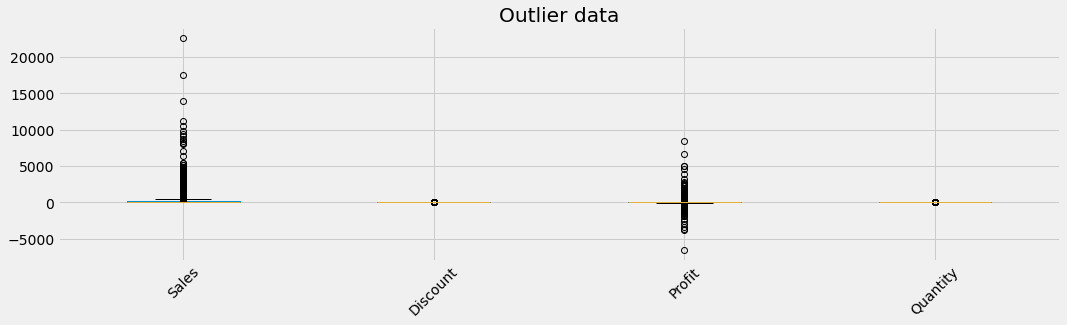

In [9]:
plt.style.use('fivethirtyeight')
outlier= df[['Sales','Discount','Profit','Quantity']].plot(kind='box',figsize=(16,4));
plt.xticks(rotation=45);
plt.title('Outlier data');

In [10]:
#Handling outlier values for Sales and Profit columns
columns = ['Sales', 'Profit']
for column_name in columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile range
    df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) |(df[column_name] > (Q3 + 1.5 * IQR)))]

In [11]:
df.shape

(7392, 21)

The number of data decreased from 9994 to 7392 after outlier data cleaning.

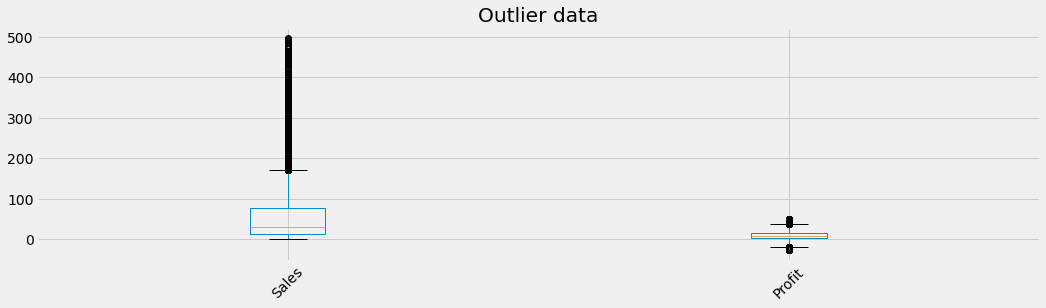

In [12]:
plt.style.use('fivethirtyeight')
outlier= df[['Sales','Profit']].plot(kind='box',figsize=(16,4));
plt.xticks(rotation=45);
plt.title('Outlier data');

In [13]:
df[['Sales','Discount','Profit','Quantity']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,7392.0,62.314599,82.271335,0.444,12.9600,30.5600,75.85000,496.8600
Discount,7392.0,0.148635,0.199668,0.000,0.0000,0.2000,0.20000,0.8000
Profit,7392.0,9.636050,13.843595,-27.735,2.1332,6.7978,16.01625,50.5848
Quantity,7392.0,3.464962,2.041211,1.000,2.0000,3.0000,5.00000,14.0000


There are still outliers for both sales and profit columns in the dataset. However, the difference between mean and median values for both columns decreased.

### Exploratory Data Analysis

In [14]:
# Creating new calculated fields
## number of days passed between order and shipment
df['Shipment Day'] = df['Ship Date']-df['Order Date']
df['Shipment Day'] = df['Shipment Day'].dt.days
## ratio of profit to sales amount
df['Profit%'] = round(df['Profit'] / df['Sales'],2)
## profit or loss information from the sale
df['Profit Flag'] = df["Profit"].apply(lambda x: 1 if x > 0 else 0)

df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipment Day,Profit%,Profit Flag
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3,0.16,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4,0.47,1


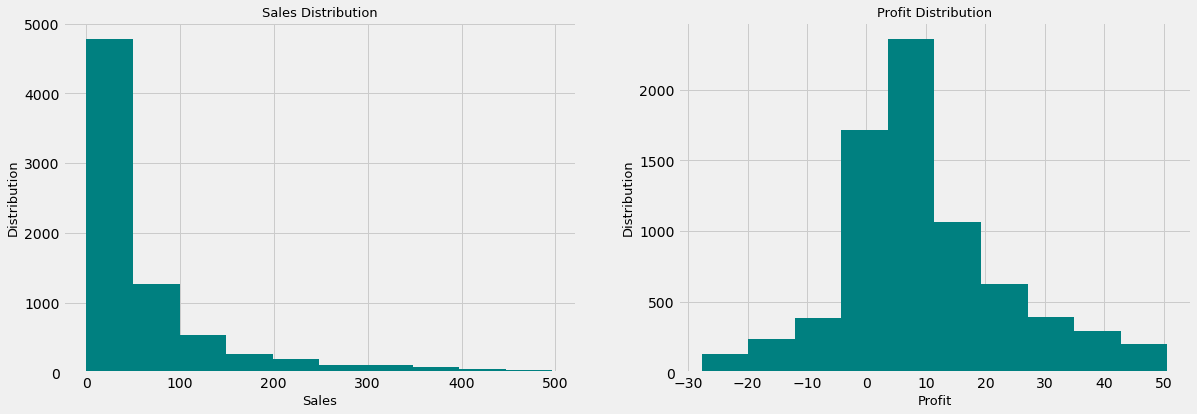

In [15]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot2grid((1,2), (0,0))
df["Sales"].hist(color="Teal")
plt.xlabel("Sales", size = 13)
plt.ylabel("Distribution", size = 13)
plt.title("Sales Distribution", fontsize=13)

plt.subplot2grid((1,2), (0,1))
df["Profit"].hist(color="Teal")
plt.xlabel("Profit", size = 13)
plt.ylabel("Distribution", size = 13)
plt.title("Profit Distribution", fontsize=13)
plt.show()

In the dataset, the sales amount is generally 100 dollar and the profit amount is 10 dollar. At the same time, it is seen that there are sales with loss.

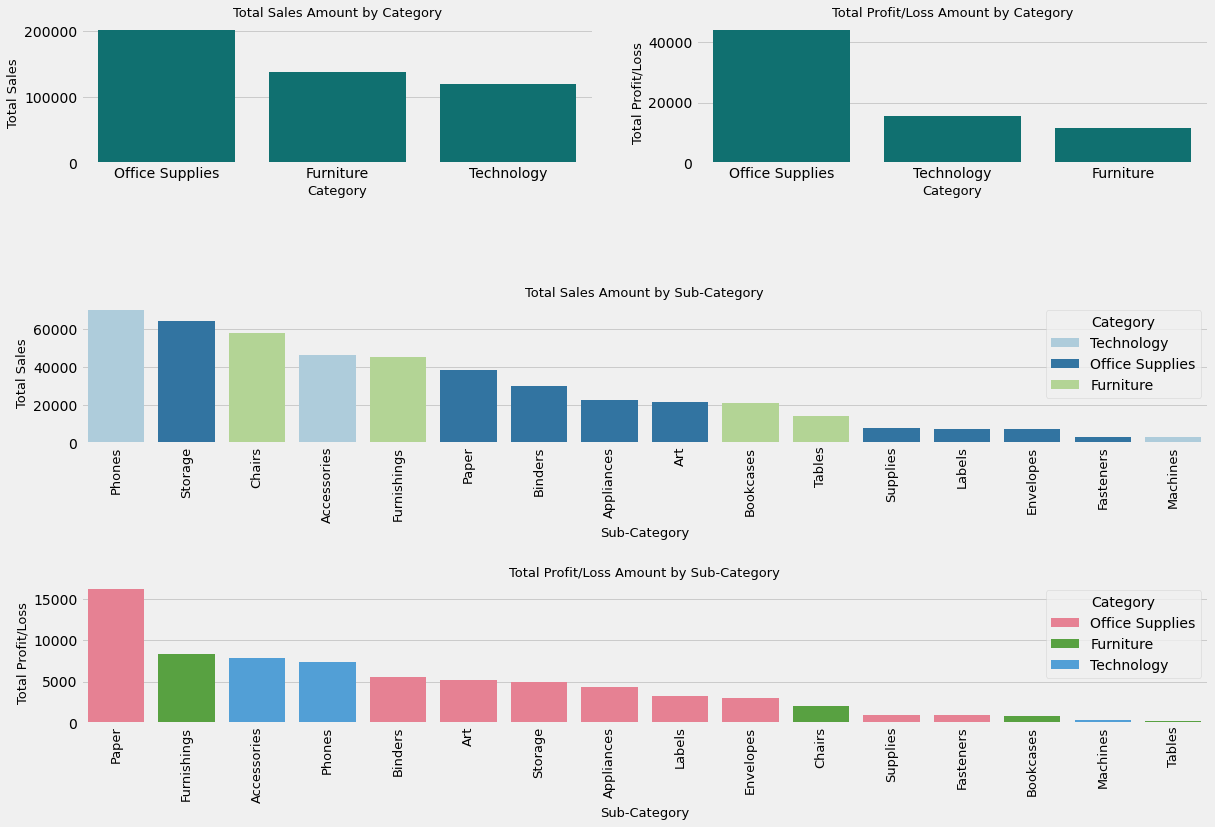

In [16]:
flg = plt.figure(figsize=(18,12))
plt.subplot2grid((3,2), (0,0))
sns.barplot(x='Category', 
            y='Sales', 
            data=df[['Category','Sales']].groupby(['Category']).sum().reset_index().sort_values('Sales', ascending=False), 
            color = ("Teal"));
plt.title("Total Sales Amount by Category", size = 13)
plt.xlabel("Category", size = 13)
plt.ylabel("Total Sales", size = 13)

plt.subplot2grid((3,2), (0,1))
sns.barplot(x='Category', 
            y='Profit', 
            data=df[['Category','Profit']].groupby(['Category']).sum().reset_index().sort_values('Profit', ascending=False),
            color = ("Teal"));
plt.title("Total Profit/Loss Amount by Category", size = 13)
plt.xlabel("Category", size = 13)
plt.ylabel("Total Profit/Loss", size = 13)

df_by_cat = df[['Sub-Category', 'Category' ,'Sales', 'Profit']].groupby(['Sub-Category', 'Category' ]).sum().reset_index()

plt.subplot2grid((3,2), (1,0), colspan=2)
sns.barplot(x='Sub-Category', 
            y='Sales', 
            data=df_by_cat.sort_values('Sales', ascending=False), 
            hue = 'Category', 
            dodge=False,
            palette = ("Paired"));
plt.title("Total Sales Amount by Sub-Category", size = 13)
plt.xticks(rotation=90, size = 13)
plt.xlabel("Sub-Category", size = 13)
plt.ylabel("Total Sales", size = 13)

plt.subplot2grid((3,2), (2,0), colspan=2)
sns.barplot(x='Sub-Category', 
            y='Profit', 
            data=df_by_cat.sort_values('Profit', ascending=False), 
            hue = 'Category', 
            dodge=False,
            palette = ("husl"));
plt.title("Total Profit/Loss Amount by Sub-Category", size = 13)
plt.xticks(rotation=90, size = 13)
plt.xlabel("Sub-Category", size = 13)
plt.ylabel("Total Profit/Loss", size = 13)

plt.subplots_adjust(hspace=1)
plt.show()

The product category with the highest total sales and profits is Office Suppliers.

While the technology category is the product category with the lowest total sales, the furniture product category has the lowest total profit.

Although the category with the highest sales amount is Office Suppliers, the sub-category with the highest sales amount is Phones belonging to the technology category.

At the same time, the lowest profit amount belongs to the Tables subcategory.

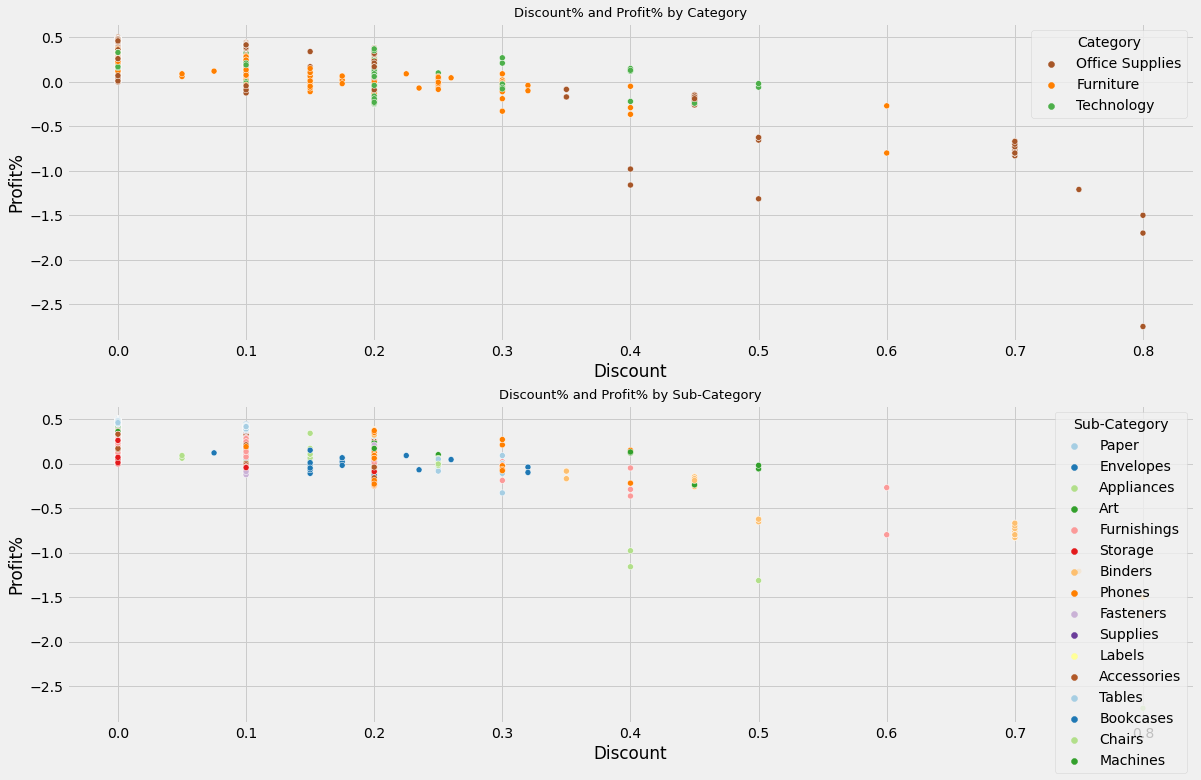

In [17]:
fig, ax = plt.subplots(figsize = (18, 12))

df_sp = df[['Discount','Profit%','Product Name','Category','Sub-Category']].groupby(['Product Name', 'Category', 'Sub-Category']).median().reset_index()
plt.subplot2grid((2,1), (0,0))
sns.scatterplot(x = "Discount", y = "Profit%", hue = "Category", palette = "Set1_r", data = df_sp)
ax.set_xlabel('Discount%', fontsize=13)
ax.set_ylabel('Profit%', fontsize=13)
plt.title('Discount% and Profit% by Category', fontsize = 13)

plt.subplot2grid((2,1), (1,0))
sns.scatterplot(x = "Discount", y = "Profit%", hue = "Sub-Category", palette = "Paired", data = df_sp)
ax.set_xlabel('Discount', fontsize=13)
ax.set_ylabel('Profit%', fontsize=13)
plt.title('Discount% and Profit% by Sub-Category', fontsize = 13)

plt.show()

In [18]:
df_loss_product=df[(df['Discount']>=0.1) & (df['Profit%']<0)]
df_loss_product[['Category','Sub-Category']].value_counts()

Category         Sub-Category
Office Supplies  Binders         493
Furniture        Furnishings     117
                 Chairs          111
Office Supplies  Storage          85
Technology       Accessories      80
                 Phones           73
Furniture        Tables           34
                 Bookcases        31
Office Supplies  Supplies         21
                 Appliances       20
                 Fasteners        12
Technology       Machines          6
dtype: int64

In order to examine why the profit amounts are low in which categories and sub-categories, the data can be looked at on a product basis.

When the ratio of the profit and discount amounts of the products to the sales amounts is analyzed, it is seen that as the discount rate increases, the profit rate decreases and the loss occurs.,

It is seen that the discount rate is mostly made in the Office Suppliers and Technology categories and only loss is obtained if a discount of 0.5 or more is made.

With this information, the company's category department is expected to analyze the damage in this sub-category and to decide on the continuation of the campaigns and discounts for the relevant products.

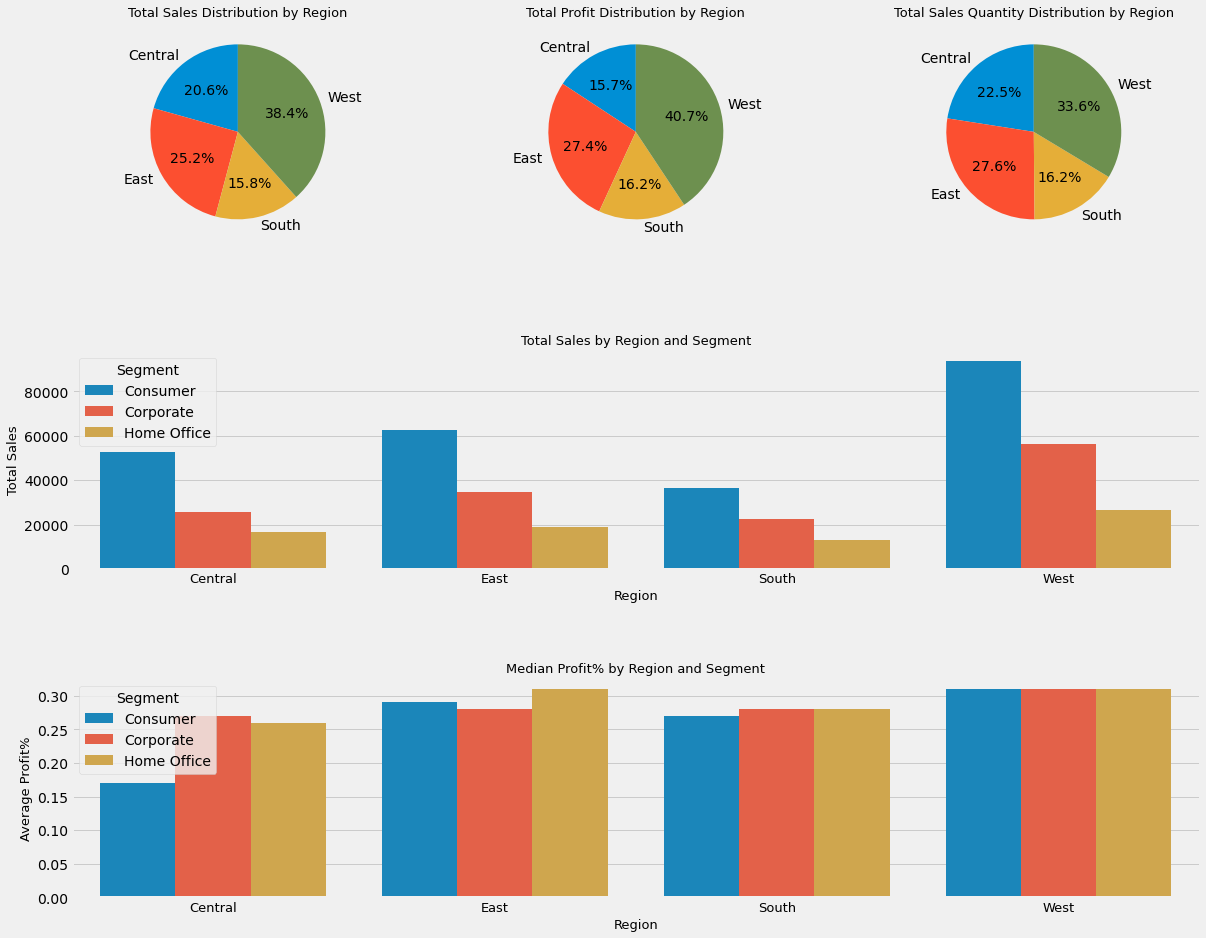

In [19]:
flg = plt.figure(figsize=(18,15))
plt.subplot2grid((3,3), (0,0))
df_pie = df[['Region','Sales','Profit', 'Quantity']].groupby(['Region']).sum().reset_index()
plt.pie(df_pie['Sales'], labels = df_pie['Region'], autopct="%0.01f%%", startangle = 90)
plt.title("Total Sales Distribution by Region", size = 13)

plt.subplot2grid((3,3), (0,1))
plt.pie(df_pie['Profit'], labels = df_pie['Region'], autopct="%0.01f%%", startangle = 90)
plt.title("Total Profit Distribution by Region", size = 13)

plt.subplot2grid((3,3), (0,2))
plt.pie(df_pie['Quantity'], labels = df_pie['Region'], autopct="%0.01f%%", startangle = 90)
plt.title("Total Sales Quantity Distribution by Region", size = 13)

plt.subplot2grid((3,3), (1,0), colspan=3)
sns.barplot(x="Region",  
            y="Sales", 
            hue="Segment", 
            data=df[['Region', 'Segment', 'Sales']].groupby(['Region', 'Segment']).sum().reset_index().sort_values('Region'))
plt.title("Total Sales by Region and Segment", size = 13)
plt.xlabel("Region", size = 13)
plt.ylabel("Total Sales", size = 13)
plt.xticks(rotation=0, size = 13)

plt.subplot2grid((3,3), (2,0), colspan=3)
sns.barplot(x="Region",  
            y="Profit%", 
            hue="Segment", 
            data=df[['Region', 'Segment', 'Profit%']].groupby(['Region', 'Segment']).median().reset_index().sort_values('Region'))
plt.title("Median Profit% by Region and Segment", size = 13)
plt.xlabel("Region", size = 13)
plt.ylabel("Average Profit%", size = 13)
plt.xticks(rotation=0, size = 13)

plt.subplots_adjust(hspace=0.5)
plt.show()

When looking at sales, profit, and the number of products sold by regions, the region with the highest rates is always West.

South is the region with the lowest share in terms of both sales and the number of products sold, while the region with the lowest share in terms of profit rate is Central. While the Central region is not the worst region in terms of sales amount and number of sales, it should be examined why it is the region with the lowest share in terms of profit amount.

When the total sales amounts in these regions are analyzed by customer segments, the highest sales volume was obtained in the Consumer, Corporate and Home Office segments for every regions, respectively.

Consumer customer segment can be shown as the reason why Central region has the lowest profit amount. Although the Corporate and Home Office customer segments in Central region showed similar profit rates with other regions, the profit rate of the Consumer customer segment by sales lower compared to other regions. This affects the total profit amount in the central region. Improvements should be made for customers in the Consumer segment in the Central region.

<Figure size 1296x432 with 0 Axes>

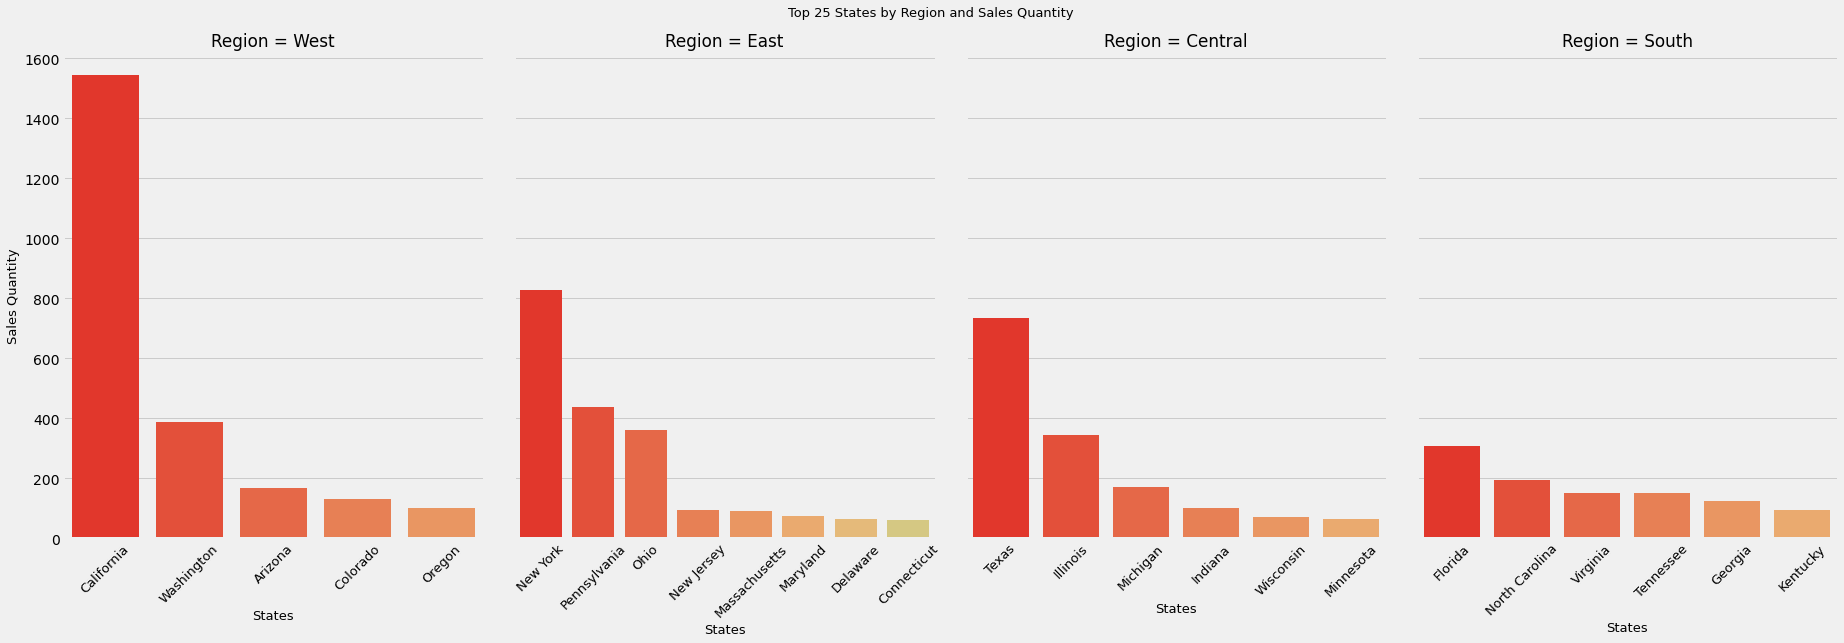

In [20]:
flg = plt.figure(figsize=(18,6))
df_bar = df[['Region', 'State']].value_counts().reset_index()
df_bar.columns = ['Region', 'State', 'Count']
df_bar = df_bar.sort_values(['Count'], ascending=False).head(25)
g = sns.catplot(x='State', 
                y='Count', 
                col='Region',
                data=df_bar,
                kind='bar', 
                palette = "rainbow_r",
                sharex=False,
                height=8,
                aspect=.8);
g.set_xticklabels(rotation=45, fontsize=13)
g.set_xlabels('States', fontsize=13)
g.set_ylabels('Sales Quantity', fontsize=13)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Top 25 States by Region and Sales Quantity', size=13)

plt.show()

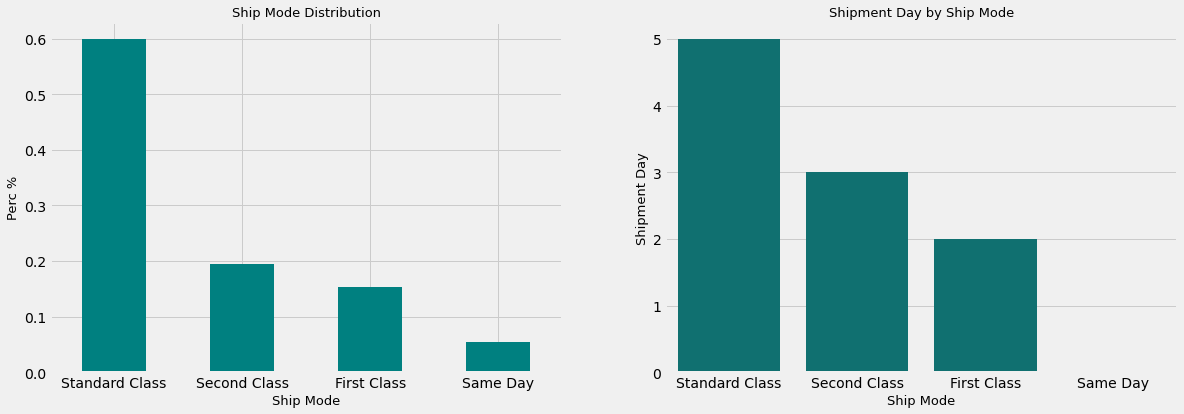

In [21]:
flg = plt.figure(figsize=(18,6))
plt.subplot2grid((1,2), (0,0))
df["Ship Mode"].value_counts(normalize=True).plot(kind="bar", color = "Teal")
plt.title("Ship Mode Distribution", size = 13)
plt.xticks(rotation=0)
plt.xlabel("Ship Mode", size = 13)
plt.ylabel("Perc %", size = 13)

plt.subplot2grid((1,2), (0,1))
sns.barplot(x='Ship Mode', 
            y='Shipment Day', 
            data=df[['Ship Mode','Shipment Day']].groupby(['Ship Mode']).median().reset_index().sort_values('Shipment Day', ascending=False),
            color = "Teal");
plt.title("Shipment Day by Ship Mode", size = 13)
plt.xlabel("Ship Mode", size = 13)
plt.ylabel("Shipment Day", size = 13)

plt.show()

Looking at the preferred Shipment mode, Standard Class mode is the most preferred. The Same Day option is the least used Shipment mode. The most used Standard Class mode is the mode with the highest number of passed days between order and shipment.

### Data Cleaning

In [22]:
def Missing_Values(df):
    variable_name=[]
    unique_value_list=[]
    total_number_unique_value=[]
    for col in df.columns:
        variable_name.append(col)
        unique_value_list.append(df[col].unique())
        total_number_unique_value.append(len(df[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,
                               "Unique Value":unique_value_list,
                               "Total Number of Unique Value":total_number_unique_value})
    return missing_data

Missing_Values(df)

,Variable,Unique Value,Total Number of Unique Value
0,Row ID,"[1, 3, 5, 6, 7, 9, 10, 13, 16, 18, 19, 20, 21,...",7392
1,Order ID,"[CA-2016-152156, CA-2016-138688, US-2015-10896...",4281
2,Order Date,"[2016-11-08T00:00:00.000000000, 2016-06-12T00:...",1200
3,Ship Date,"[2016-11-11T00:00:00.000000000, 2016-06-16T00:...",1293
4,Ship Mode,"[Second Class, Standard Class, First Class, Sa...",4
5,Customer ID,"[CG-12520, DV-13045, SO-20335, BH-11710, AA-10...",789
6,Customer Name,"[Claire Gute, Darrin Van Huff, Sean O'Donnell,...",789
7,Segment,"[Consumer, Corporate, Home Office]",3
8,Country,[United States],1
9,City,"[Henderson, Los Angeles, Fort Lauderdale, Conc...",505


Row ID, Order ID, Customer ID, Postal Code columns are unimportant for analysis and modelling.

Since the Order Date and Shipment Date columns cannot be used directly in the model, it was used in the model by obtaining meaningful data from the two columns.

The Country column has a single value. For this reason, it is unnecessary to include it in the data.

The Product Name column is unnecessary, as there are details such as category and sub-category of the product. At the same time, city information has been removed because it contains region and state information.

For this reason, the columns mentioned above have been dropped from the dataset.

In [23]:
df = df.drop(['Row ID',
         'Order ID',
         'Order Date',
         'Ship Date',
         'Country', 
         'Customer ID', 
         'Customer Name', 
         'Postal Code', 
         'Product ID',
         'Product Name',
         'City'
        ], axis = 1)

In [24]:
df.shape

(7392, 13)

After removing the unnecessary columns, there are 13 columns in the dataset.

### Convert Categorical Columns

In order to use categorical columns in the model, all categorical columns are converted with the Label Encoder method.

In [25]:
le = preprocessing.LabelEncoder()
df['Ship Mode'] = le.fit_transform(df['Ship Mode'])

# 0: First Class
# 1: Same Day
# 2: Second Class
# 3: Standard Class

df['Segment'] = le.fit_transform(df['Segment'])

# 0: Consumer
# 1: Corporate
# 2: Home Office

df['Region'] = le.fit_transform(df['Region'])

# 0: Central
# 1: East
# 2: South
# 3: West

df['State'] = le.fit_transform(df['State'])
df['Category'] = le.fit_transform(df['Category'])
df['Sub-Category'] = le.fit_transform(df['Sub-Category'])

In [26]:
#Final version of dataset
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipment Day,Profit%,Profit Flag
0,2,0,15,2,0,4,261.960,2,0.0,41.9136,3,0.16,1
2,2,1,3,3,1,9,14.620,2,0.0,6.8714,4,0.47,1
4,3,0,8,2,1,13,22.368,2,0.2,2.5164,7,0.11,1
5,3,0,3,3,0,8,48.860,7,0.0,14.1694,5,0.29,1
6,3,0,3,3,1,2,7.280,4,0.0,1.9656,5,0.27,1


###### Heat Map

<AxesSubplot:>

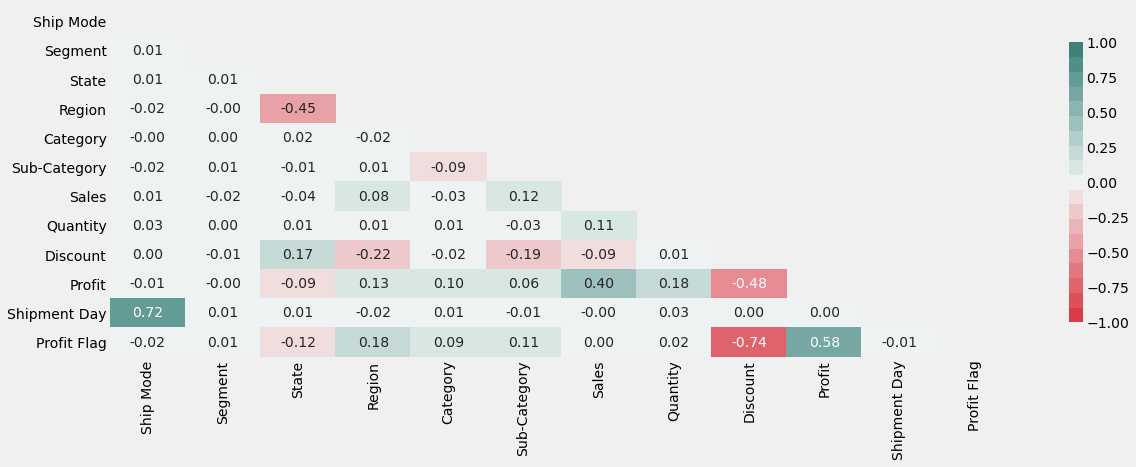

In [27]:
df_corr = df.copy()
df_corr = df_corr.drop(['Profit%'], axis = 1).corr()
fig, ax = plt.subplots(figsize=(18, 6))
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
sns.heatmap(df_corr, mask = mask, annot = True, fmt = ".2f", cmap = sns.diverging_palette(10, 180, n=19),
           vmin = -1, vmax = 1, cbar_kws = {"shrink": .8})

The heat map method is used to analyze the correlations between the variables. The correlation between Discount and Profit Flag variables has the highest correlation value. There is an inverse relationship between them. For example, as the discount increases, the probability of loss from that product increases. 

Another high correlation value is the Shipment Day and Shipment Mode columns. There is a directly proportional relationship between them. For example: As Ship Mode increases, shipment day increases.

### Training and Test Sets: Splitting Data

In [28]:
X = df.drop(["Profit Flag", "Profit", "Profit%"], axis = 1)
y = df["Profit Flag"]

print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (7392, 10)
y shape :  (7392,)


In [29]:
df['Profit Flag'].value_counts().reset_index()

,index,Profit Flag
0,1,6264
1,0,1128


The Profit and Profit% columns are removed from the X variable because they are associated with the Profit Flag variable.

In [30]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.4)
X, y = undersample.fit_resample(X, y)

print('X.shape :', X.shape)
print('y.shape :', y.shape)
print(Counter(y))

X.shape : (3948, 10)
y.shape : (3948,)
Counter({1: 2820, 0: 1128})


In [31]:
y.value_counts().reset_index()

,index,Profit Flag
0,1,2820
1,0,1128


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

#training set = 0.70
#test set = 0.30

x_train_shape = X_train.shape
x_test_shape = X_test.shape

print("X_train shape = {}\nX_test shape = {}".format(x_train_shape, x_test_shape))

X_train shape = (2763, 10)
X_test shape = (1185, 10)


The dataset is splitted into 70% training and 30% testing. While there are 2763 rows and 10 columns in the x_tranin, there are 1185 rows and 11 columns in the x_test.

### Random Forest

Since the target variable is a dummy variable, the random forest algorithm is preferred.

In [33]:
rf_pipe = RandomForestClassifier()
rf_pipe.fit(X_train,y_train)

rf_train_predict = rf_pipe.predict(X_train)
rf_test_predict = rf_pipe.predict(X_test)

print('classification_report on test set for RF')
print(' ')
print(classification_report(y_test, rf_test_predict))

print("Random forest Recall is ", recall_score(y_test, rf_test_predict) * 100)
print("Random forest Precision is ", precision_score(y_test, rf_test_predict) * 100)
print("Random forest Accuracy is ", accuracy_score(y_test, rf_test_predict) * 100)

classification_report on test set for RF
 
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       362
           1       0.92      0.95      0.94       823

    accuracy                           0.91      1185
   macro avg       0.90      0.88      0.89      1185
weighted avg       0.91      0.91      0.91      1185

Random forest Recall is  95.26123936816525
Random forest Precision is  92.01877934272301
Random forest Accuracy is  90.9704641350211


<AxesSubplot:>

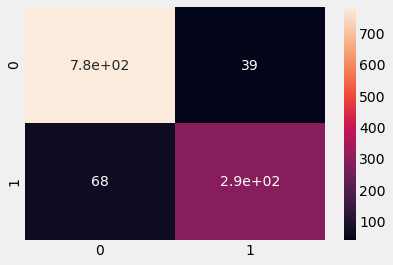

In [34]:
cf=metrics.confusion_matrix(y_test,rf_pipe.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True)

Although the Accuracy value is high, there is not much difference between the Recall and Precision values. When the confusion matrix is examined, it is seen that the number of incorrectly guessed records is less than the total record. There are 84 records that are estimated to be lossable despite being profitable, and 27 records that are estimated to be profitable despite being lossable.

Thanks to this study, category experts in an e-commerce company will be able to predict whether the sale of that product will bring profit or loss according to the product's category, sub-category, customer's segment, region, country, and most importantly, the sales amount and the discount rate.

### Logistic Regression 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

#training set = 0.70
#test set = 0.30

x_train_shape = X_train.shape
x_test_shape = X_test.shape

print("X_train shape = {}\nX_test shape = {}".format(x_train_shape, x_test_shape))

X_train shape = (2763, 10)
X_test shape = (1185, 10)


In [43]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = model.predict(X_test)

In [45]:
print('classification_report on test set for Logistic Regression')
print(' ')
print(classification_report(y_true = y_test, y_pred = y_pred))

print("Logistic Regression Recall is ", recall_score(y_test, y_pred) *  100)
print("Logistic Regression Precision is ", precision_score(y_test, y_pred) *  100)
print("Logistic Regression Accuracy is ", accuracy_score(y_test, y_pred) *100)

classification_report on test set for Logistic Regression
 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       362
           1       0.86      0.99      0.92       823

    accuracy                           0.88      1185
   macro avg       0.91      0.82      0.85      1185
weighted avg       0.89      0.88      0.88      1185

Logistic Regression Recall is  98.66342648845686
Logistic Regression Precision is  86.38297872340426
Logistic Regression Accuracy is  88.27004219409282


<AxesSubplot:>

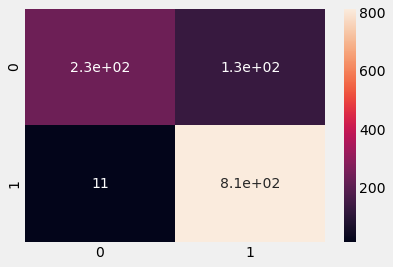

In [41]:
cf=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)